<a href="https://colab.research.google.com/github/adii-bendre/GenAI-ChatGPT/blob/main/Deep_NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_test = to_categorical(y_test, num_classes=10)

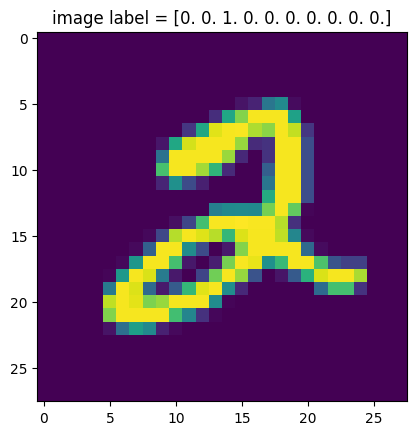

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [ ]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)), # input layer neuron 784
    Dense(5, activation = 'relu'), # hidden layer 5 neuron
    Dense(10, activation = 'softmax'), # output layer 10 neuron
])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 4s - 2ms/step - accuracy: 0.7421 - loss: 0.8486
Epoch 2/5
1875/1875 - 3s - 2ms/step - accuracy: 0.8612 - loss: 0.4749
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8694 - loss: 0.4402
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8751 - loss: 0.4211
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8783 - loss: 0.4085


In [ ]:
y_train = to_categorical(y_train, num_classes=10)

In [ ]:
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.4558


[0.40589237213134766, 0.8817999958992004]

In [ ]:
model.get_weights()

[array([[ 0.06316316,  0.05806233,  0.06876346,  0.0554603 ,  0.04393028],
        [-0.01759947, -0.05314144, -0.0604051 ,  0.00547317, -0.04415986],
        [-0.06815747, -0.02798638,  0.00756422,  0.04865873,  0.03478286],
        ...,
        [-0.0502741 ,  0.05603968,  0.04564515,  0.05662577, -0.02250244],
        [ 0.07076669,  0.05809751, -0.02386773, -0.04154544, -0.06061725],
        [ 0.06559202, -0.00244299, -0.07764164, -0.03037578, -0.07594899]],
       dtype=float32),
 array([-0.23820163,  0.2955245 ,  0.554833  , -0.52810377,  0.22448064],
       dtype=float32),
 array([[ 0.5116766 , -1.3739719 ,  0.40727735, -0.62331635,  0.3757485 ,
         -0.1460367 ,  0.9373863 , -0.6963469 ,  0.20536934, -0.0779899 ],
        [-0.45070833, -0.34525216, -0.30997774,  0.38353533,  0.80613047,
         -0.16889454, -0.53508663,  0.43730798, -0.16190383,  0.7605109 ],
        [-0.50531286,  0.73440605, -0.8715298 , -0.09959719, -0.26231858,
          0.706612  ,  0.19941954, -1.804731

In [ ]:
model.save("mnist_model.h5")

In [ ]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, concatenate

In [ ]:
input_layer = Input(shape = (28,28))
flatten = Flatten(input_shape = (28,28))(input_layer)
hidden1 = Dense(128, activation = 'relu')(flatten)
hidden2 = Dense(256, activation = 'relu')(flatten)
hidden11 = Dense(64, activation = 'relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer = Dense(10, activation = 'softmax')(merge)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Model(inputs = input_layer, outputs = output_layer)

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 784)       │          0 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 128)       │    100,480 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 64)        │      8,256 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 256)       │    200,960 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 320)       │          0 │ dense_41[0][0],   │
│ (Concatenate)       │                   │            │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 10)        │      3,210 │ concatenate_9[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,906 (1.19 MB)

 Trainable params: 312,906 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

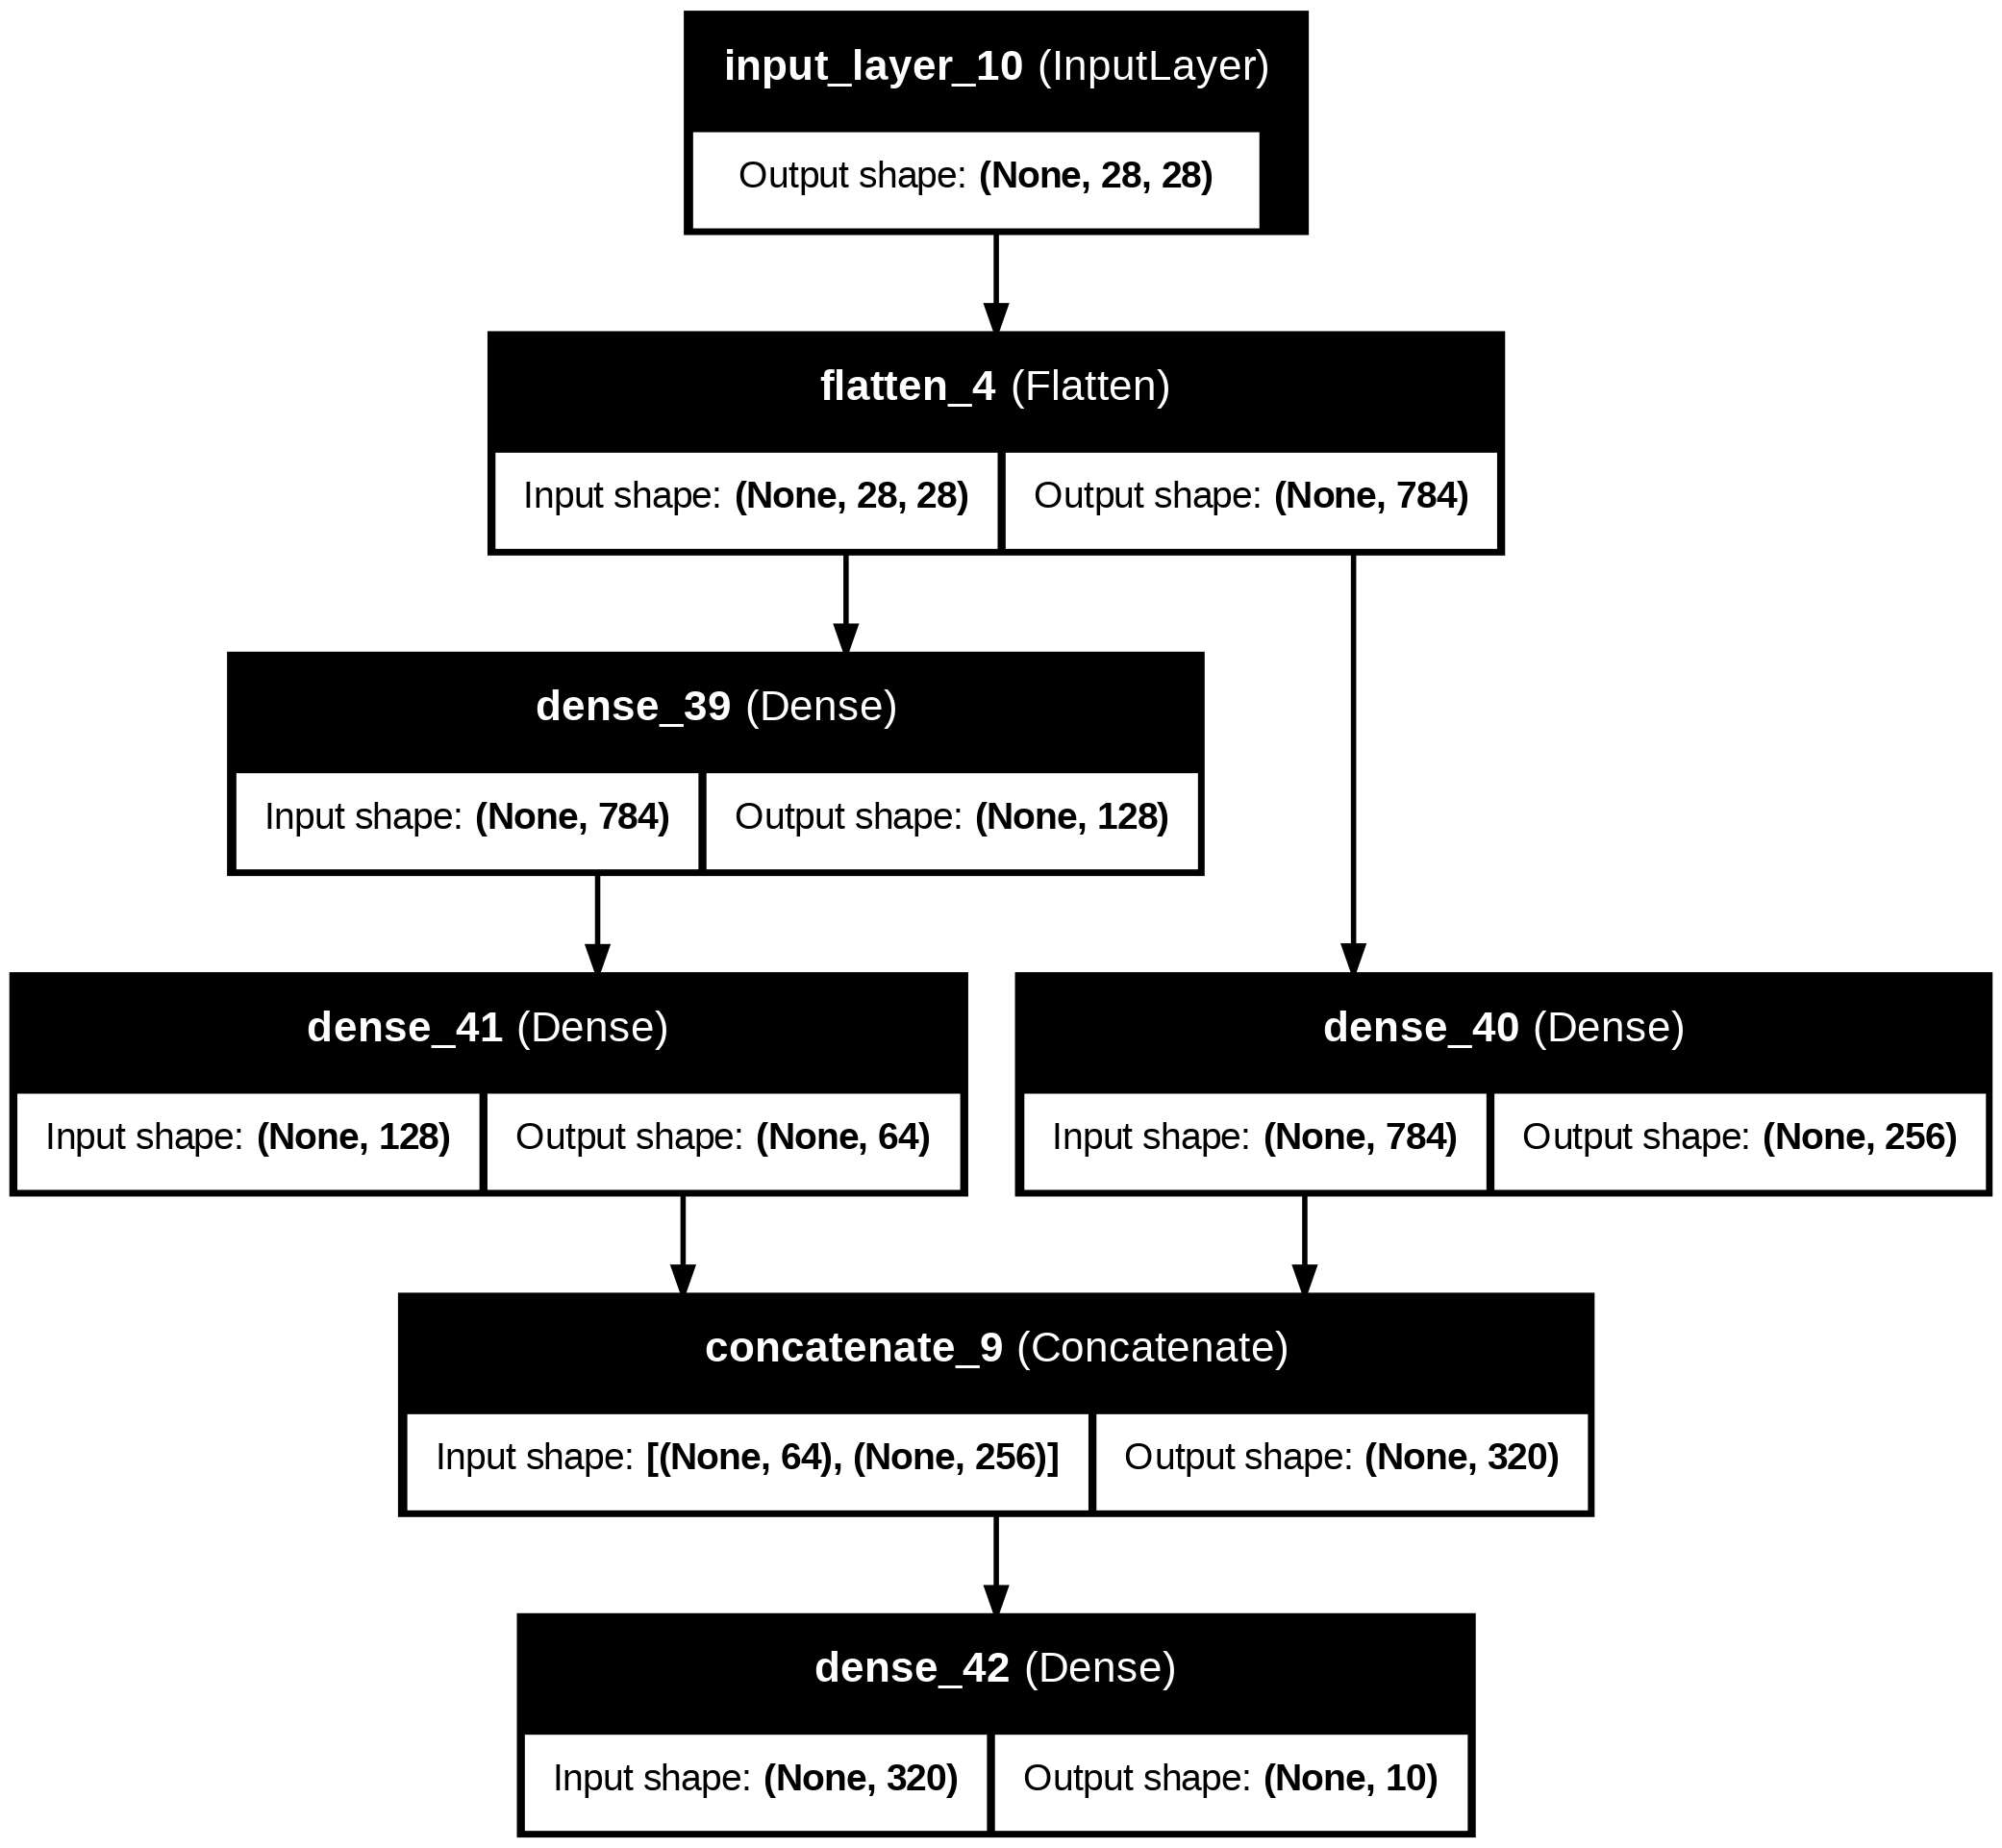

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9388 - loss: 0.2061
Epoch 2/5
1875/1875 - 21s - 11ms/step - accuracy: 0.9741 - loss: 0.0830
Epoch 3/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9827 - loss: 0.0546
Epoch 4/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9873 - loss: 0.0387
Epoch 5/5
1875/1875 - 13s - 7ms/step - accuracy: 0.9902 - loss: 0.0299


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.0868


[0.07206452637910843, 0.9782000184059143]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')